In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from warnings import filterwarnings

filterwarnings('ignore')

sns.set_style('darkgrid')


In [3]:
consumption_df = pd.read_csv('/content/drive/My Drive/ml_data/new_work.csv', index_col='Unnamed: 0')

In [4]:
consumption_df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 158.3+ MB


In [6]:
consumption_df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [7]:
consumption_df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [8]:
year = pd.to_datetime(consumption_df['Date'], dayfirst=True).dt.year

In [9]:
year.unique()

array([2006, 2007, 2008, 2009, 2010])

Text(0.5, 1.0, 'A plot of the number of observations made in each year')

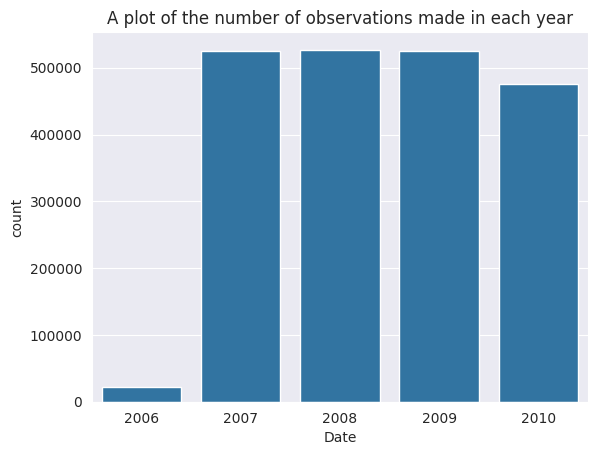

In [10]:
sns.countplot(consumption_df, x=year)
plt.title('A plot of the number of observations made in each year')

In [11]:
month = pd.to_datetime(consumption_df['Date'], dayfirst=True).dt.month

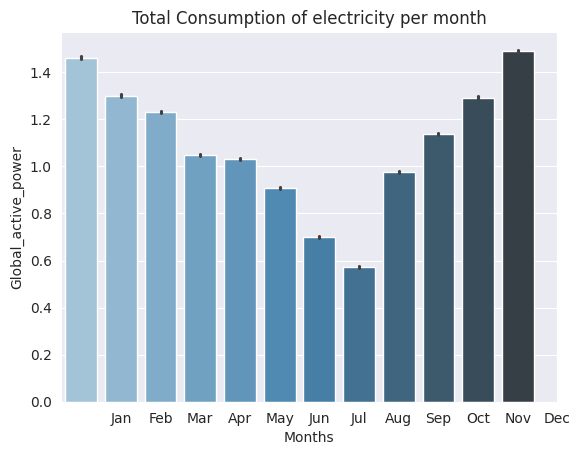

In [12]:
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(consumption_df, x=month, y=consumption_df['Global_active_power'] , palette='Blues_d')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12], labels=month_name)
plt.title('Total Consumption of electricity per month')
plt.xlabel('Months')
plt.savefig('months.png')

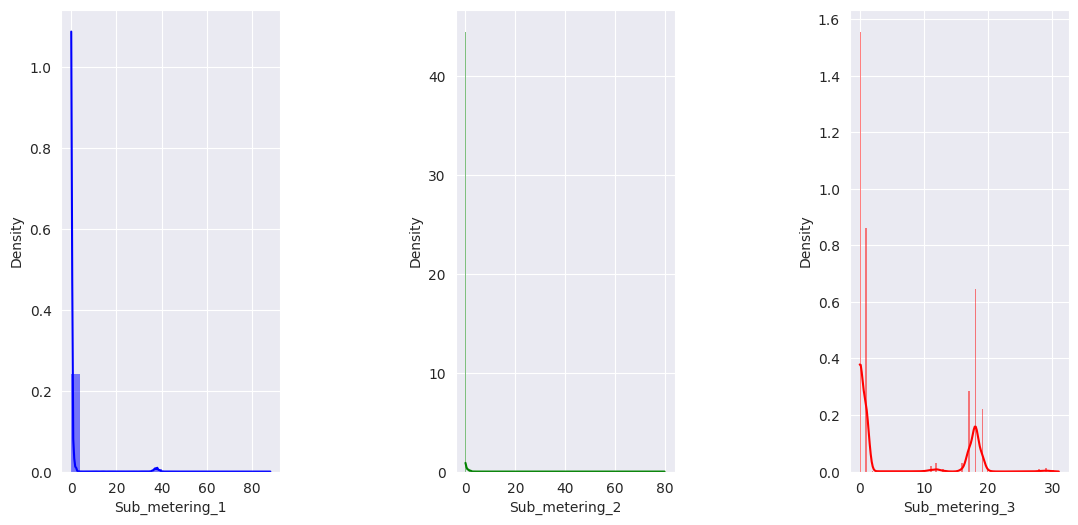

In [13]:
fig1, ax1 = plt.subplots(ncols=3, nrows=1, figsize=(13,6))

sns.histplot(consumption_df, x=consumption_df['Sub_metering_1'], ax=ax1[0], color="blue",  kde=True, stat="density", linewidth=0, label="100% Equities")
sns.histplot(consumption_df, x=consumption_df['Sub_metering_2'], ax=ax1[1], color="green",  kde=True, stat="density", linewidth=0, label="100% Equities")
sns.histplot(consumption_df, x=consumption_df['Sub_metering_3'], ax=ax1[2], color="red",  kde=True, stat="density", linewidth=0, label="100% Equities")
plt.subplots_adjust(wspace=0.8, hspace=0.8)

In [14]:
fig_p = px.histogram(consumption_df, x='Global_active_power', marginal='box', title='Distribution of Global Active Power')
fig_p.update_layout(height=400, width=600)
fig_p.show()

Output hidden; open in https://colab.research.google.com to view.

In [15]:
fig_p2 = px.histogram(consumption_df, x='Voltage', marginal='box', title='Distribution of Voltage')
fig_p2.update_layout(height=400, width=600)
fig_p2.show()


Output hidden; open in https://colab.research.google.com to view.

In [16]:
fig_p3 = px.histogram(consumption_df, x='Global_intensity', marginal='box', title='Distribution of Global Intensity')
fig_p3.update_layout(height=400, width=600)
fig_p3.show()


Output hidden; open in https://colab.research.google.com to view.

<Axes: >

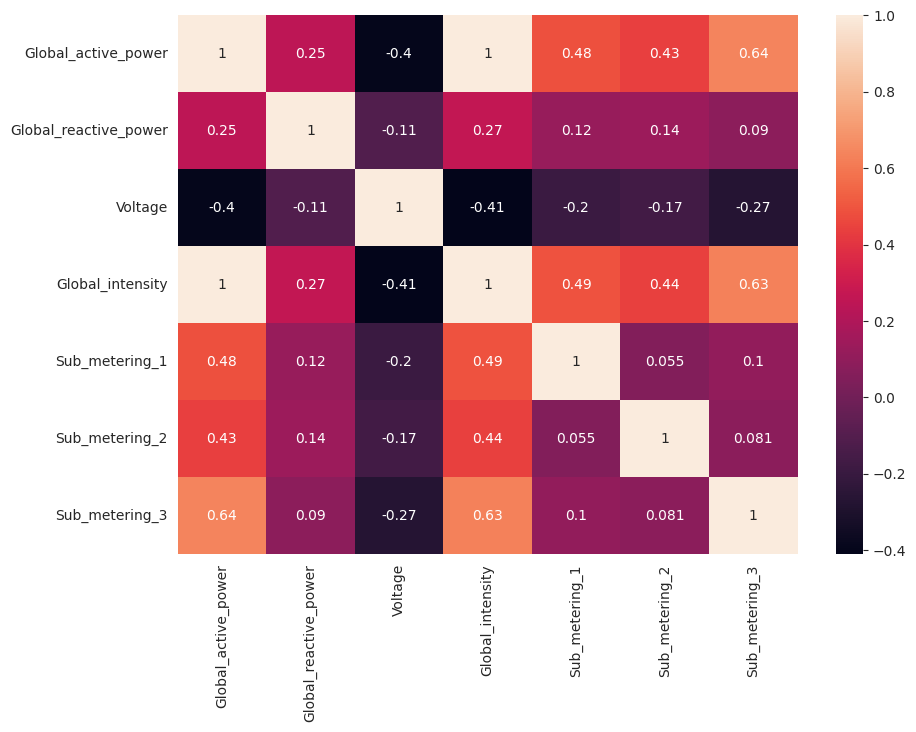

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(consumption_df.corr(numeric_only=True), annot=True)

### CHECKING FOR MISSING VALUES

In [18]:
consumption_df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [19]:
missing_df = consumption_df[consumption_df['Global_active_power'].isna()]

In [20]:
cols = np.array(['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3'])
consumption_df.dropna(subset=cols.flatten(), inplace=True)

In [21]:
consumption_df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Selecting the numeric columns

In [22]:
numeric_cols = consumption_df.select_dtypes(np.number).columns.to_list()

## TRAINING THE MODEL

Now we split the data into 3, (training, validation and test data sets)

In [23]:
year = pd.to_datetime(consumption_df['Date'], dayfirst=True).dt.year

train_df = consumption_df[year < 2009]
val_df = consumption_df[year == 2009]
test_df = consumption_df[year > 2009]

In [24]:
a = consumption_df.shape[0]

print(f"Train percentage: {(train_df.shape[0]/a)*100}")
print(f"Val percentage: {(val_df.shape[0]/a)*100}")
print(f"Test percentage: {(test_df.shape[0]/a)*100}")

Train percentage: 52.24107979387883
Val percentage: 25.439178638351027
Test percentage: 22.319741567770144


We discard the Date and Time columns since training the model using these features might lead to an overfitness of the model. Hence we redefine the input features we will use to build the model.

In [25]:
input_cols = train_df.columns[2:]
input_cols

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

Now we select the 3 sets with only the selected input features.

In [26]:
train_inputs_df = train_df[input_cols]
val_inputs_df = val_df[input_cols]
test_inputs_df = test_df[input_cols]

Because of the different ranges in the numerical columns, we normalize the data using the MinMaxScaler class of sklearn.preprocessing to reduce the values to a range of [0 - 1].

In [27]:
scaler = MinMaxScaler()
scaler.fit(train_inputs_df)

MinMaxScaler()

Maximum value in each feature column

In [28]:
scaler.data_max_

array([ 10.67,   1.39, 252.14,  46.4 ,  80.  ,  78.  ,  31.  ])

Minimum Value in each feature column

In [29]:
scaler.data_min_

array([7.6000e-02, 0.0000e+00, 2.2349e+02, 2.0000e-01, 0.0000e+00,
       0.0000e+00, 0.0000e+00])

Applying the normalization to the training set

In [30]:
train_inputs_scaled_df = scaler.transform(train_inputs_df)
train_inputs_scaled_df

array([[0.39078724, 0.30071942, 0.39616056, ..., 0.        , 0.01282051,
        0.5483871 ],
       [0.49877289, 0.31366906, 0.3539267 , ..., 0.        , 0.01282051,
        0.51612903],
       [0.50009439, 0.35827338, 0.34205934, ..., 0.        , 0.02564103,
        0.5483871 ],
       ...,
       [0.03832358, 0.04604317, 0.82024433, ..., 0.        , 0.        ,
        0.        ],
       [0.03813479, 0.04604317, 0.80383944, ..., 0.        , 0.        ,
        0.        ],
       [0.03832358, 0.04460432, 0.81954625, ..., 0.        , 0.        ,
        0.        ]])

We use the elbow method to determine the optimal number of clusters for our dataset

In [31]:
k_range = list(range(1,10))
wcss = []
# labels = []

for i in k_range:
    km = KMeans(n_clusters=i, tol=0.0000001, random_state=44)
    km.fit(train_inputs_scaled_df)
    wcss.append(km.inertia_)

wcss

[133351.3040767762,
 48799.649509124516,
 39208.044378273495,
 33647.65469707513,
 28864.375778466412,
 26018.697556396313,
 23422.920769809745,
 21217.751553650363,
 19537.08484952491]

Text(0.5, 1.0, 'within-cluster sum of squares ($wcss$) vs Number of Clusters ($k$)')

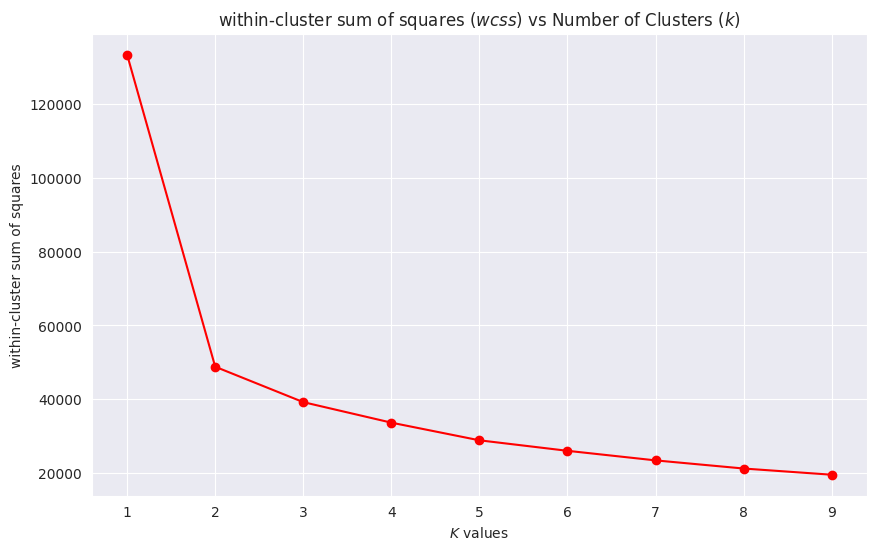

In [32]:
plt.figure(figsize=(10,6))
plt.plot(k_range, wcss, color='red', marker='o')
plt.xlabel('$K$ values')
plt.ylabel('within-cluster sum of squares')
plt.title('within-cluster sum of squares ($wcss$) vs Number of Clusters ($k$)')

From the plot, we can see that the optimal number of clusters is 2. Hence we train the model using 2 clusters.

In [33]:
k = 2
model = KMeans(n_clusters=k, tol=0.0000001, random_state=44)
model.fit(train_inputs_scaled_df)

KMeans(n_clusters=2, random_state=44, tol=1e-07)

Labels of the clusters

In [34]:
model.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

Centroids of the clusters

In [35]:
model.cluster_centers_

array([[0.19344507, 0.0929876 , 0.5281344 , 0.18901832, 0.02828774,
        0.03185036, 0.56549565],
       [0.05043178, 0.08038748, 0.60199091, 0.05304787, 0.00791914,
        0.01226989, 0.00730363]])

Calculating the percentage error of the clusters

In [36]:
print(f"Percentage Error: {(model.inertia_/train_inputs_df.shape[0])*100:.2f}%")

Percentage Error: 4.56%


Analysing and interpreting the clusters to determine the sub-metering that consumes a lot of electrical power.

Plotting the number of observations in each cluster.

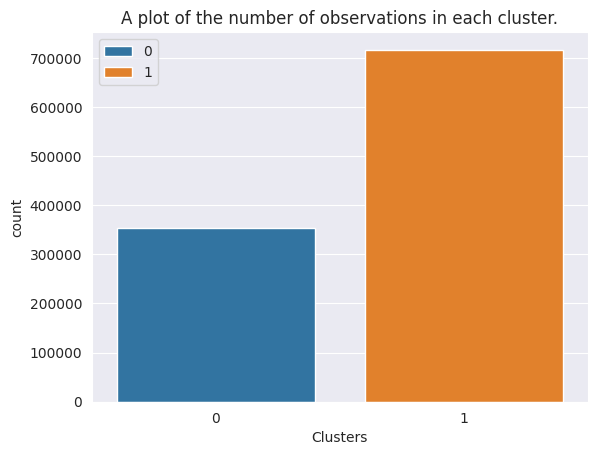

In [37]:
train_pred = model.predict(train_inputs_scaled_df)

sns.countplot(x=train_pred, hue=(train_pred))
plt.title('A plot of the number of observations in each cluster.')
plt.xlabel('Clusters')
plt.savefig('bar_clusters.png')

In [38]:
sub_metering_labs = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Subsetting the sub_meterings in cluster 0
means_sub_met_clus_0 = np.mean(train_inputs_scaled_df[train_pred == 0][:, 4:], axis=0)*100
print(f"Sub Metering Averages for cluster 0: {means_sub_met_clus_0}")

means_sub_met_clus_1 = np.mean(train_inputs_scaled_df[train_pred == 1][:, 4:], axis=0)*100
print(f"Sub Metering Averages for cluster 1: {means_sub_met_clus_1}")

ffff = pd.DataFrame([means_sub_met_clus_0, means_sub_met_clus_1], columns = sub_metering_labs, index=['Cluster_0', 'Cluster_1'])
ffff

Sub Metering Averages for cluster 0: [ 2.82877389  3.18503648 56.54956519]
Sub Metering Averages for cluster 1: [0.79191373 1.22698894 0.73036337]


,Sub_metering_1,Sub_metering_2,Sub_metering_3
Cluster_0,2.828774,3.185036,56.549565
Cluster_1,0.791914,1.226989,0.730363


1. Cluster 0:

 Sub Metering Averages: [2.83%, 3.19%, 56.55%]

    Interpretation:
    In Cluster 0, the highest average sub-metering value is observed in Sub_metering_3 (56.55%), indicating that a significant portion of electricity consumption in this cluster is attributed to appliances associated with Sub_metering_3, such as the electric water heater and air conditioner.
    The average sub-metering values for Sub_metering_1 (2.83%) and Sub_metering_2 (3.19%) are comparatively lower, suggesting that the contribution of appliances in these categories (e.g., kitchen appliances, laundry room appliances) to the total electricity consumption in Cluster 0 is relatively less.
2. Cluster 1:

  Sub Metering Averages: [0.79%, 1.23%, 0.73%]

    Interpretation:
    In Cluster 1, the average sub-metering values for Sub_metering_1 (0.79%) and Sub_metering_2 (1.23%) are relatively lower compared to Cluster 0, indicating a relatively lower contribution from appliances associated with these categories (e.g., kitchen appliances, laundry room appliances) to the total electricity consumption in Cluster 1.
3. Overall Interpretation:

  The interpretation of the sub-metering averages provides insights into the distribution of electricity consumption across different appliances or areas of the household within each cluster.
  By analyzing the relative percentages of sub-metering categories within each cluster, you can understand the electricity consumption patterns and the predominant appliances contributing to those patterns in each cluster.

### Using PCA to reduce the dimensions of the data to enable to visualize the resulting clusters.

In [39]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(train_inputs_scaled_df)
reduced_df = pd.DataFrame(reduced_df, columns=['PC1', 'PC2'])

Explained Variation per component

In [40]:
pca.explained_variance_ratio_*100

array([66.37586646, 14.45888142])

Explained Variation by the two components

In [41]:
np.sum(pca.explained_variance_ratio_*100)

80.83474788173683

In [42]:
reduced_df = pd.concat([reduced_df, pd.DataFrame(model.labels_, columns=['targets'])], axis=1)
reduced_df

,PC1,PC2,targets
0,0.519591,0.238201,0
1,0.554911,0.364730,0
2,0.588674,0.370966,0
3,0.585956,0.360777,0
4,0.488144,0.192859,0
...,...,...,...
1070561,-0.249512,-0.115588,1
1070562,-0.247722,-0.110171,1
1070563,-0.245771,-0.104346,1
1070564,-0.243276,-0.096826,1


Checking the contribution of each of the original features to the new components.

In [43]:
pd.DataFrame(np.abs(pca.components_), columns=train_inputs_df.columns, index=['PC1','PC2'])

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
PC1,0.282377,0.037506,0.155318,0.270123,0.060751,0.059280,0.902530
PC2,0.441560,0.201123,0.463525,0.439667,0.309756,0.317498,0.399573


Applying PCA on the centroids

In [44]:
pca_centroids = pca.transform(model.cluster_centers_)
pca_centroids


array([[ 0.39851085, -0.03401934],
       [-0.19672894,  0.01679399]])

Plotting the clusters and the centroids of the predicted clusters of the training set.

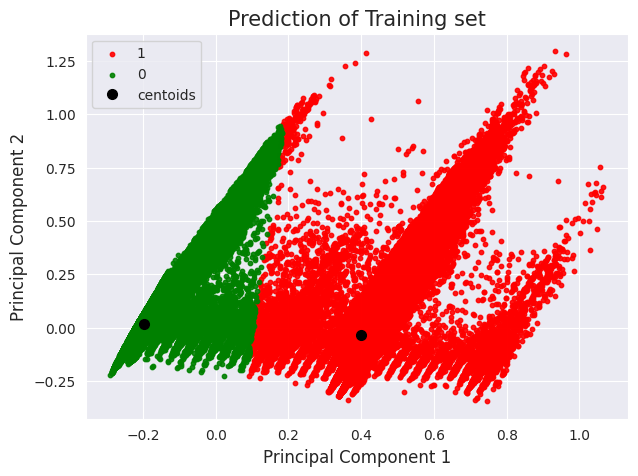

In [45]:
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('Prediction of Training set', fontsize = 15)
targets = list(np.unique(model.labels_))
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = reduced_df['targets'] == target
    ax.scatter(reduced_df.loc[indicesToKeep, 'PC1']
               , reduced_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 10, alpha=0.9)
plt.plot(pca_centroids[:,0], pca_centroids[:,1], 'ko', markersize=7)
ax.legend([1, 0] + ['centoids'])
plt.savefig('Training.png')

Plotting the clusters in 3D to be able to visualize it more clearly

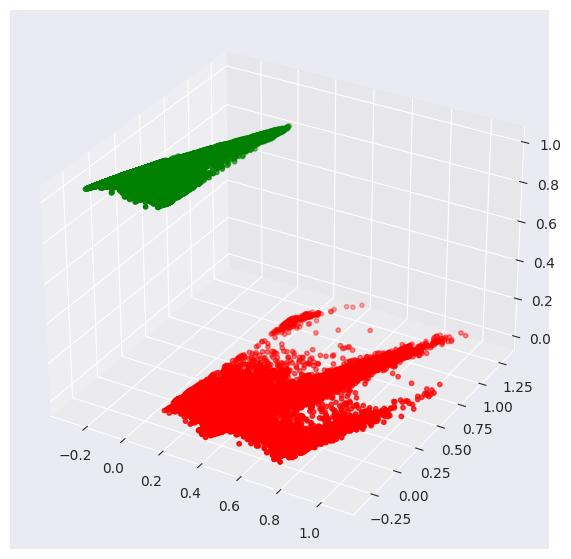

In [46]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_df[reduced_df['targets'] == 0]['PC1'],
           reduced_df[reduced_df['targets'] == 0]['PC2'],
            reduced_df[reduced_df['targets'] == 0]['targets'],
            s = 10 , color = 'red', label = "cluster 0")
ax.scatter(reduced_df[reduced_df['targets'] == 1]['PC1'],
           reduced_df[reduced_df['targets'] == 1]['PC2'],
            reduced_df[reduced_df['targets'] == 1]['targets'],
            s = 10 , color = 'green', label = "cluster 0")

Steps in making new predictions
1. Transform the new dataset using the scaler trained by the model.
2. Use the model to predict the clusters
3. Use PCA to reduce the dimension to enable for visualization.

Now, let's define a function tha automates the prediction step and gives us the visualizations

In [47]:
def make_new_predictions(data, title, color = ['r', 'b'], pc1_name='PC1', pc2_name='PC2', target_name='Clusters'):
    # Scaling new data
    scaled_data = scaler.transform(data)

    # Predicting the clusters of the new data
    predictions = model.predict(scaled_data)

    # Reducing the dimensions using PCA
    pca_model = pca.transform(scaled_data)

    # Creating a new data frame for the 2 principal components and predictions made.
    new_df = pd.concat([ pd.DataFrame(pca_model, columns=[pc1_name, pc2_name]), pd.DataFrame(predictions, columns=[target_name])], axis=1)
    # print(new_df.head(10))

    # Plotting the reults
    fig = plt.figure(figsize = (7,5))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 12)
    ax.set_ylabel('Principal Component 2', fontsize = 12)
    ax.set_title(f'Prediction of {title} set', fontsize = 15)
    targets = np.unique(model.labels_)
    colors = color
    for target, col in zip(targets,color):
        indicesToKeep = new_df[target_name] == target
        ax.scatter(new_df.loc[indicesToKeep, pc1_name]
                , new_df.loc[indicesToKeep, pc2_name]
                , c = col
                , s = 10, alpha=0.9)
    plt.plot(pca_centroids[:,0], pca_centroids[:,1], 'ko', markersize=7)
    ax.legend([1,0] + ['Centroids'])
    plt.savefig(title + '.png')


Predicting and plotting the clusters of the validation set.

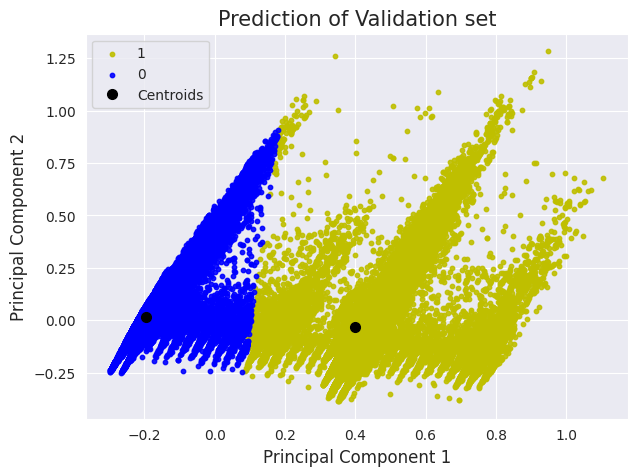

In [48]:
make_new_predictions(val_inputs_df, 'Validation', color=['y', 'b'])

Predicting and plotting the clusters of the Test set.

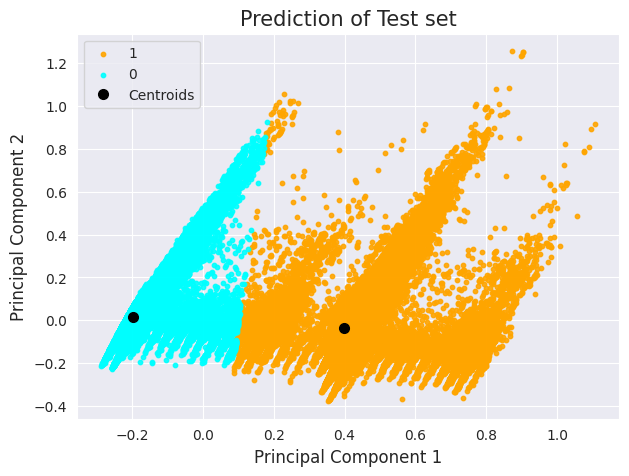

In [49]:
make_new_predictions(test_inputs_df, 'Test', color=['orange', 'cyan'])